In [33]:
!module load cuda11.8
import gensim
from top2vec import Top2Vec
from gensim.models.coherencemodel import CoherenceModel
import os
import pandas as pd
import numpy as np

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [4]:
PATH = "/home/doosti@chapman.edu/projects/Facebook/top2vec/"
DATA_PATH = os.path.join(PATH,'data')
# model names
models = [
    "top2vec_learn_doc2vec_2024-06-20.model",
    "top2vec_deeplearn_universal_notoken_2024-06-25.model",
    "top2vec_deeplearn_universal_2024-06-25.model",
    "top2vec_deeplearn_universal_2024-06-20.model",
    "top2vec_deeplearn_doc2vec_notoken_2024-06-21.model",
    "top2vec_deeplearn_distiluse_notoken_2024-06-27.model"
]

for model_name in models:
    model_path = os.path.join(DATA_PATH,model_name)
    model = Top2Vec.load(model_path)
    print(model_name)
    try:
        print(model.document_vectors.shape)
    except AttributeError:
        print("No document vectors")

top2vec_deeplearn_distiluse_notoken_2024-06-27.model
(820099, 512)


In [5]:
final_models= [ "top2vec_deeplearn_universal_notoken_2024-06-25.model",
                "top2vec_deeplearn_universal_2024-06-25.model",
                "top2vec_deeplearn_doc2vec_notoken_2024-06-21.model",
                "top2vec_deeplearn_distiluse_notoken_2024-06-27.model"]

In [6]:
model = Top2Vec.load(os.path.join(DATA_PATH,final_models[3]))

In [7]:
topic_sizes, topic_nums = model.get_topic_sizes()
print(f"Number of topics: {len(topic_sizes)}")

Number of topics: 3936


In [11]:
hierarchy = model.hierarchical_topic_reduction(3935, interval=10) # super slow

In [15]:
for item in hierarchy:
    if len(item)>1:
        print(item)

[3935, 1900]


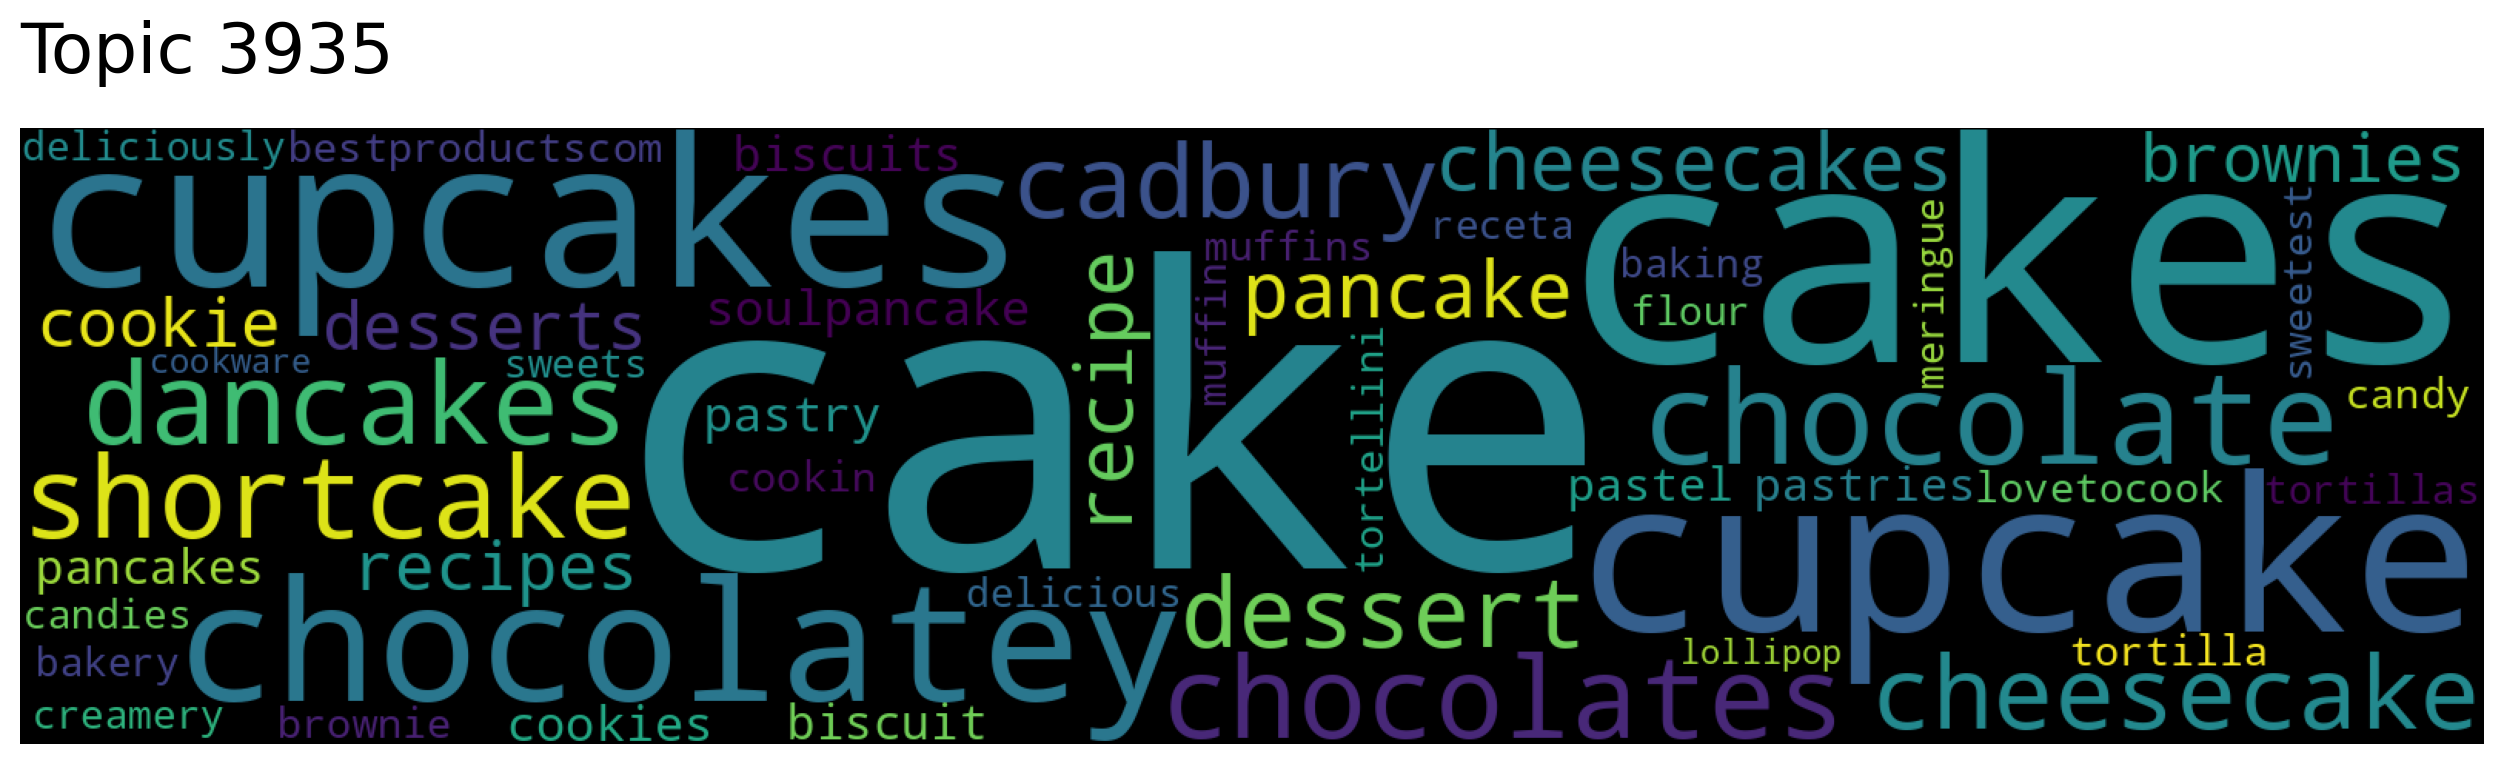

In [16]:
model.generate_topic_wordcloud(3935)

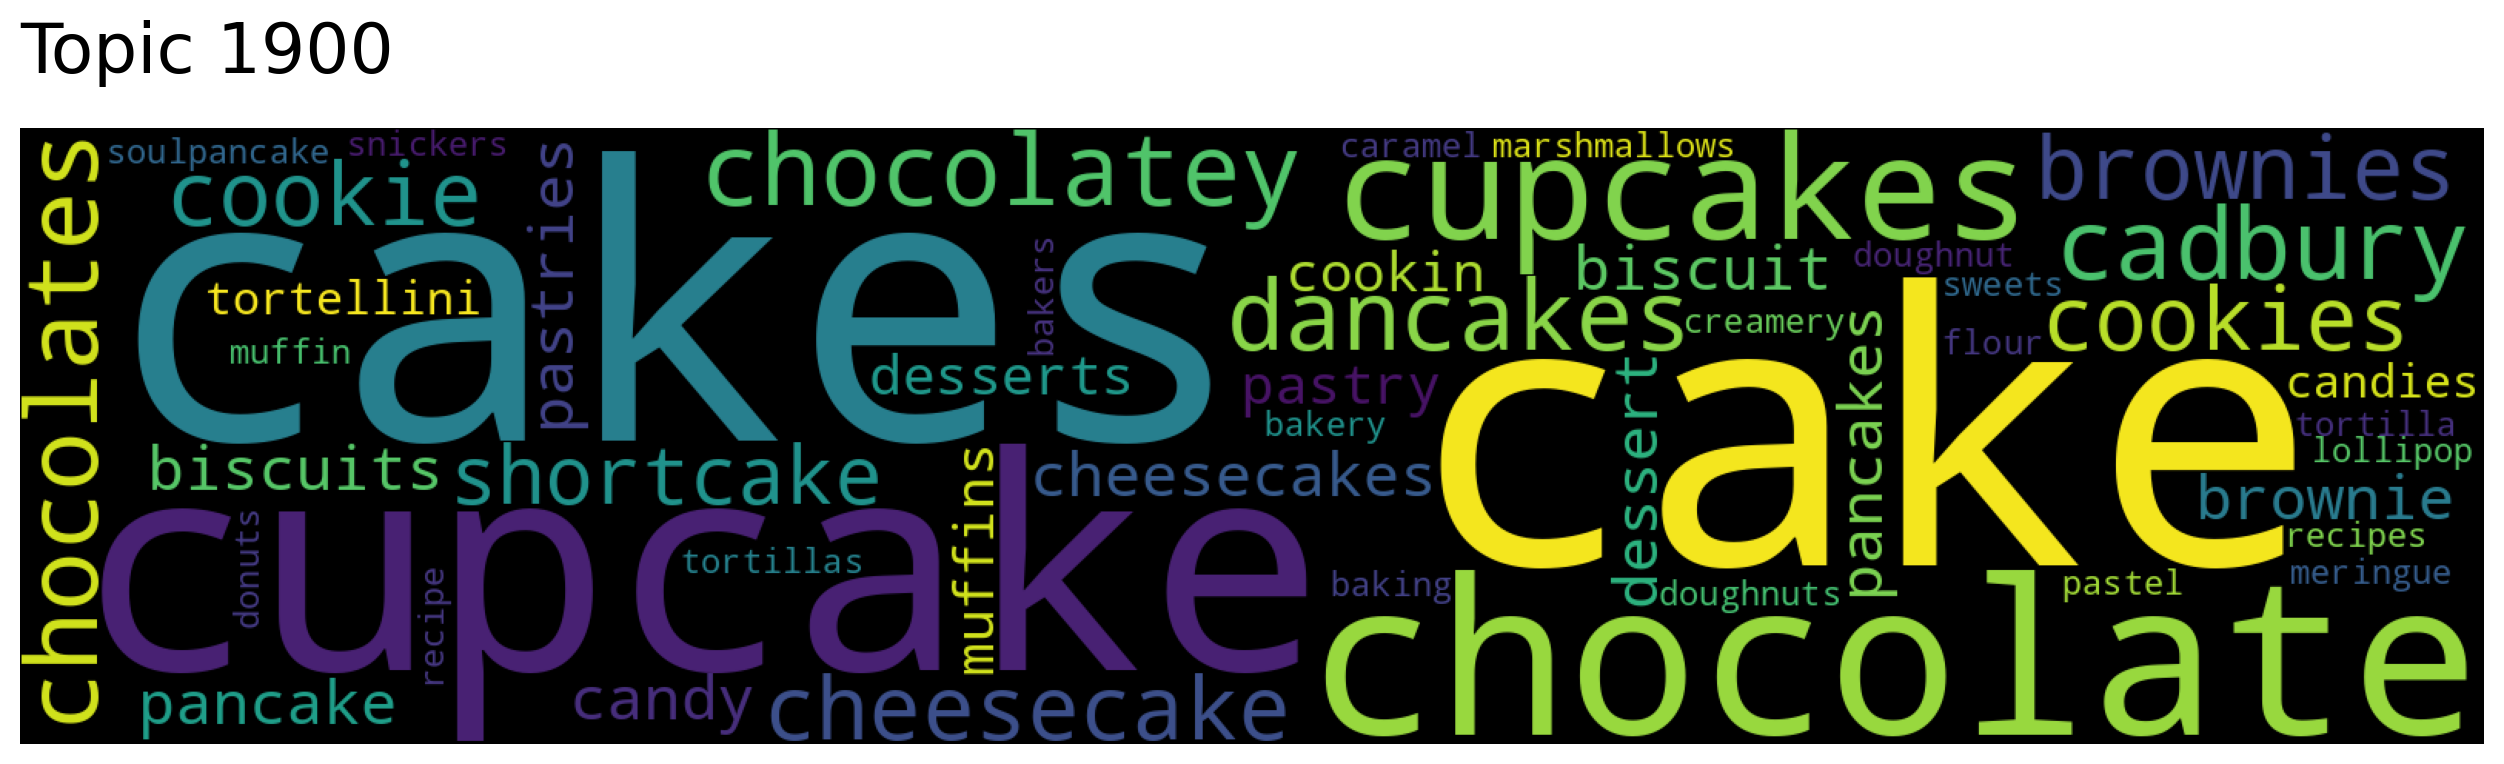

In [17]:
model.generate_topic_wordcloud(1900)

In [23]:
docs, _1, _2 = model.search_documents_by_documents(doc_ids=[810944], num_docs=10)
print(docs)

['iphone x review everything you need to know about apple new ive been using the iphone x for a week and its definitely worth the  price tag topics are apple inc iphone'
 'iphone  review we got our hands on the iphone  here everything you need to know topics are iphone mashable'
 'you might want to wait on the new iphone heres why you should wait to buy the new iphone topics are iphone facial recognition system'
 'iphone x iphone   plus everything you need to know video iphone x iphone   plus everything you need to know catch the story here topics are iphone apple'
 'should you upgrade your iphone i wont trade in my iphone s for an iphone  or iphone x here why topics are iphone'
 'detailed preview of the iphone x the apple iphone x drops friday november  here a sneak peek at everything you can expect when you purchase topics are iphone android'
 'apple debuts the iphone  here everything you need to know about iphone  in  seconds'
 'everything you should know about the iphone  apple iph

In [18]:
docs, _1, ids = model.search_documents_by_keywords(keywords=["espresso"], num_docs=10)
print(docs)

['colombian coffee' 'tiësto' 'treadmeal' 'coffee prescription mug' 'ciotb'
 'ciotb ' 'you artisanal coffees' 'coutinhoesque' 'coutinhoesque' 'vroom']


In [26]:
docs, scores, ids = model.query_documents(query="eggplant parmesan recipe", num_docs=10)
for i, doc in enumerate(docs):
    print(f"Document: {doc[:100]}... Score: {scores[i]}")

Document: zucchini lasagna full recipe... Score: 0.7828225493431091
Document: eggplant lasagna rollups full recipe... Score: 0.7628051042556763
Document: mac n cheese pie full recipe... Score: 0.7500165104866028
Document: potato pizza full recipe... Score: 0.7317991256713867
Document: cheesy zucchini sticks full recipe... Score: 0.7291792631149292
Document: pizzadilla full recipe... Score: 0.7236137390136719
Document: macaroni pie macaroni pie full recipe... Score: 0.7200453281402588
Document: swiss meringue buttercream recipe... Score: 0.7002636194229126
Document: mac n cheese lasagne full recipe... Score: 0.7002456784248352
Document: baked garlic parmesan zucchini chips baked garlic parmesan zucchini chips get the recipe... Score: 0.6984798908233643


In [22]:
print(docs[5])

portable espresso coffee machine we all know someone that always needs a coffee topics are coffee espresso coffeemaker


In [ ]:
# clustering using umap and hdbscan
# def clustering(model):
#     model.hierarchical_topic_reduction(0.1)
#     model.umap_topic_reduction(n_neighbors=15, min_dist=0.1)
#     model.hdbscan_topic_reduction(min_cluster_size=15)
#     return model

In [34]:
# calculate aggregated creator embeddings
topic_nums, topic_scores, topic_words, word_scores = model.get_documents_topics(np.arange(10),num_topics=10)

In [36]:
topic_nums.shape

(10, 10)

## Calculate Creator Embeddings

In [37]:
# load data
data = pd.read_csv(os.path.join(DATA_PATH,'data_all_text.csv'))
print(data.head())
print(data.shape)

<bound method NDFrame.head of                 video_id  creator_id creator_name  \
0       1190269044321450  pk9VLWYHbU       Natvia   
1       1291085517573135  pk9VLWYHbU       Natvia   
2       1248117868536567  pk9VLWYHbU       Natvia   
3       1281233388558348  pk9VLWYHbU       Natvia   
4       1296194533728900  pk9VLWYHbU       Natvia   
...                  ...         ...          ...   
820094  1785232911518457  yKefZBsWDy  TBS Network   
820095  1819445951429877  yKefZBsWDy  TBS Network   
820096  1737622982945508  yKefZBsWDy  TBS Network   
820097  1737500779624395  yKefZBsWDy  TBS Network   
820098  1720177048023435  yKefZBsWDy  TBS Network   

                                                    title  \
0                 How to make Sugar free Natvia Cupcakes!   
1                        Homemade Low Sugar Vanilla Slice   
2                   Low Sugar Cheesecake with Museli Base   
3              Sugar Free Lemon Ricotta Almond Cheesecake   
4                           

/tmp/ipykernel_6329/3054004349.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(DATA_PATH,'data_all_text.csv'))


In [38]:
# calculate creator embeddings
document_vectors = model.document_vectors
creators = data['creator_name'].values

# Group document vectors by author
from collections import defaultdict

creator_to_vectors = defaultdict(list)

for creator, vector in zip(creators, document_vectors):
    creator_to_vectors[creator].append(vector)

creator_embeddings = {}

for creator, vectors in creator_to_vectors.items():
    # Calculate the mean vector (centroid) for each author
    creator_embeddings[creator] = np.mean(vectors, axis=0)
    # l2 normalization
    creator_embeddings[creator] /= np.linalg.norm(creator_embeddings[creator])

print(len(creator_embeddings))

4679


In [59]:
# calculate cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

def get_similar_creators(creator, creator_embeddings, top_n=5):
    creator_embedding = creator_embeddings[creator]
    similarities = {}
    for key, value in creator_embeddings.items():
        similarities[key] = cosine_similarity([creator_embedding], [value])[0][0]
    similar_creators = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return similar_creators[:top_n]

def print_similar_creators(creator, similar_creators):
    print(f"Creators similar to {creator}:")
    for i, (creator, similarity) in enumerate(similar_creators):
        print(f"{i+1:2d}. ({similarity:4.2f}) {creator}")

In [69]:
creator = 'Chick-fil-A'
similar_creators = get_similar_creators(creator, creator_embeddings, top_n=10)
print_similar_creators(creator, similar_creators)

Creators similar to Chick-fil-A:
 1. (1.00) Chick-fil-A
 2. (0.82) Southern Living
 3. (0.81) KFC
 4. (0.80) Sanderson Farms Chicken
 5. (0.80) Jollibee
 6. (0.80) Foodbeast
 7. (0.80) Culver's
 8. (0.80) SheKnows
 9. (0.79) Country Living Magazine
10. (0.79) Jewel-Osco
